### Problem Statement
- To predict whether the performed transaction is fraud or normal.


### Data set
- The dataset is taken from https://www.kaggle.com/mlg-ulb/creditcardfraud
#####  The given dataset contains following parameters:
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numeric input variables which are the result of a PCA transformation.  
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


#### Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Versions of packages

In [3]:
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)

numpy: 1.16.5
pandas: 0.25.1
seaborn: 0.9.0
matplotlib: 3.1.1


#### Reading the dataset

In [4]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### To check number of rows and columns in the given dataset.

In [5]:
data.shape

(284807, 31)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

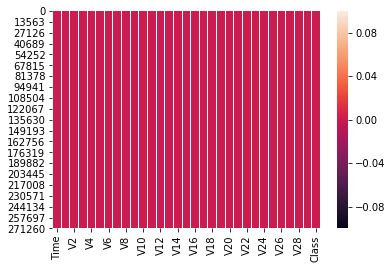

In [11]:
sns.heatmap(data.isna())

In [12]:
fraud = data[data['Class']==1]
Normal = data[data['Class']==0]
print(fraud.shape,Normal.shape)

(492, 31) (284315, 31)


Text(0, 0.5, 'frequency')

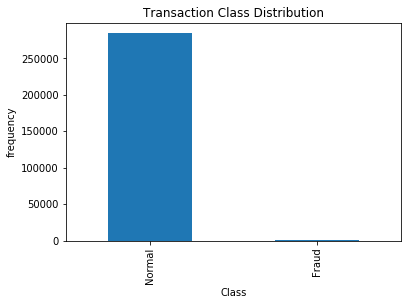

In [13]:
LABELS = ["Normal" , "Fraud"]
count_classes = pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("frequency")


From above graph we can see that the data is highly unbalanced i.e it has very high number of normal transactions when compared to that of fraud transactions

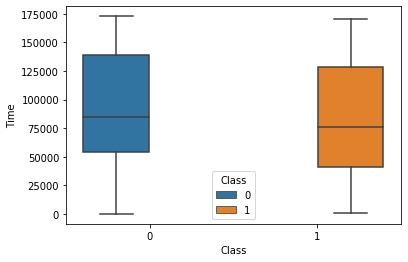

In [14]:
sns.boxplot(x = "Class", y = "Time",hue='Class', data = data)
plt.show()

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

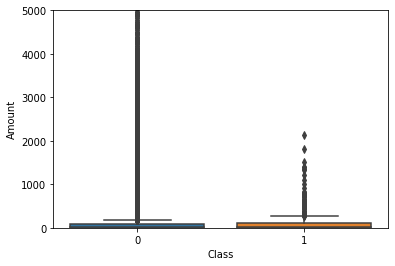

In [15]:
sns.boxplot(x = "Class", y = "Amount", data = data)
plt.ylim(0, 5000)
plt.show()

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

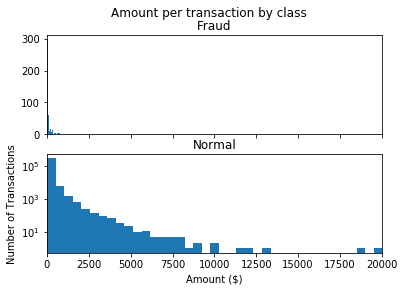

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1,sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

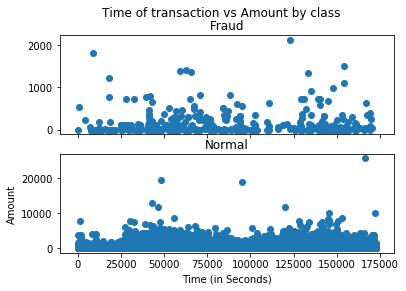

In [17]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

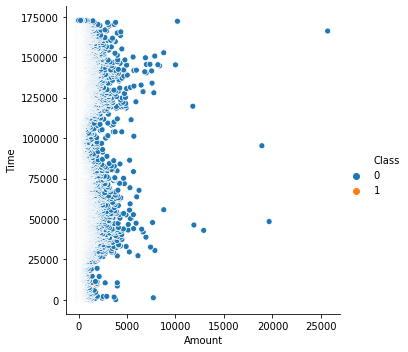

In [18]:
sns.relplot(x='Amount',y='Time',hue='Class',data=data)

From the above graph we can observe that we have very less number of fraud transactions when compared to normal transactions ,which states that it is an imbalanced dataset

### Balancing the dataset

In [19]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=120)
X,y = smk.fit_sample(data.drop(['Class'],axis=1),data['Class'])

In [20]:
y.value_counts()

1    283765
0    283765
Name: Class, dtype: int64

In [21]:
#Splitting the dataset into training and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454024, 30)
(113506, 30)
(454024,)
(113506,)


In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
# we have to apply this object(Log_reg) to the training data
final_model1 = log_reg.fit(X_train,y_train) # with the help of fit method we are fitting logistic regression with training data
##objectName.fit(InputData, outputData)

#### Instead of directly predicting on test data, let us see how well the model predicts the training data
- Predicting on the training data

```syntax: objectName.predict(Input)```

In [24]:
y_train_pred = log_reg.predict(X_train)
y_train_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
y_train == y_train_pred # comparing original data o/p and model predicted o/p

119440    True
96043     True
369660    True
207082    True
433513    True
          ... 
371403    True
491263    True
470924    True
491755    True
128037    True
Name: Class, Length: 454024, dtype: bool

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[222404,   4496],
       [  8081, 219043]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9722988212076895

- Predicting on test data

In [28]:
# Predicting the model on test data
y_test_pred = log_reg.predict(X_test)

In [29]:
y_test_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
y_test == y_test_pred

395737    True
473850    True
50426     True
344637    True
148214    True
          ... 
234610    True
169248    True
508560    True
336336    True
504712    True
Name: Class, Length: 113506, dtype: bool

In [31]:
confusion_matrix(y_test,y_test_pred)

array([[55727,  1138],
       [ 1959, 54682]], dtype=int64)

In [32]:
accuracy_score(y_test,y_test_pred)

0.9727150987612989

In [33]:
#classification report on training and test data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))
print("-----------------------------------------------------")
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    226900
           1       0.98      0.96      0.97    227124

    accuracy                           0.97    454024
   macro avg       0.97      0.97      0.97    454024
weighted avg       0.97      0.97      0.97    454024

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56865
           1       0.98      0.97      0.97     56641

    accuracy                           0.97    113506
   macro avg       0.97      0.97      0.97    113506
weighted avg       0.97      0.97      0.97    113506



In [34]:
y_test_prob1 = final_model1.predict_proba(X_test)
y_test_prob1 = pd.DataFrame(y_test_prob1)
y_test_prob1.head()

,0,1
0,0.000000e+00,1.000000
1,9.035439e-12,1.000000
2,9.510145e-01,0.048985
3,0.000000e+00,1.000000
4,8.709488e-01,0.129051


In [77]:
dataf = pd.DataFrame({"col3": [0.000000e+00,9.035439e-12,9.510145e-01,0.000000e+00,8.709488e-01]})
dataf

,col3
0,0.000000e+00
1,9.035439e-12
2,9.510145e-01
3,0.000000e+00
4,8.709488e-01


In [78]:
dataf['col3'] = dataf['col3'].astype(int)
dataf

,col3
0,0
1,0
2,0
3,0
4,0


In [35]:
y_test

395737    1
473850    1
50426     0
344637    1
148214    0
         ..
234610    0
169248    0
508560    1
336336    1
504712    1
Name: Class, Length: 113506, dtype: int64

### Plot the ROC Curve for the model and find the AUC for LogisticRegression

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob1 = final_model1.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, fraud_prob1)

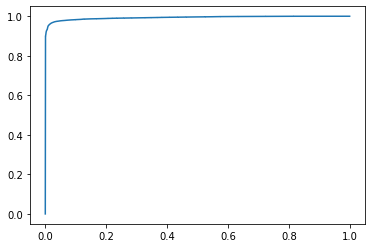

In [37]:
plt.plot(fpr1, tpr1)

In [38]:
roc_auc_score(y_test, fraud_prob1)

0.9930467703750365

### Random forest classification

In [39]:
#import initialize and fit
#import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

#initialize the object for RFC
rfc = RandomForestClassifier()

#fit RFC to dataset
final_model2 = rfc.fit(X_train,y_train)

In [40]:
y_train_pred1 = rfc.predict(X_train) #Predicting on training data

In [41]:
confusion_matrix(y_train,y_train_pred1)

array([[226900,      0],
       [     0, 227124]], dtype=int64)

In [42]:
accuracy_score(y_train,y_train_pred1)

1.0

In [43]:
y_test_pred1 = rfc.predict(X_test) #Predicting on test data

In [44]:
confusion_matrix(y_test,y_test_pred1)

array([[56851,    14],
       [    0, 56641]], dtype=int64)

In [45]:
accuracy_score(y_test,y_test_pred1)

0.9998766585026342

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred1))
print("------------------------------------------------------")
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226900
           1       1.00      1.00      1.00    227124

    accuracy                           1.00    454024
   macro avg       1.00      1.00      1.00    454024
weighted avg       1.00      1.00      1.00    454024

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       1.00      1.00      1.00     56641

    accuracy                           1.00    113506
   macro avg       1.00      1.00      1.00    113506
weighted avg       1.00      1.00      1.00    113506



In [47]:
y_test_prob2 = final_model2.predict_proba(X_test)
y_test_prob2 = pd.DataFrame(y_test_prob2)
y_test_prob2.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
113501,1.0,0.0
113502,1.0,0.0
113503,0.0,1.0
113504,0.0,1.0


In [48]:
y_test.head()

395737    1
473850    1
50426     0
344637    1
148214    0
         ..
234610    0
169248    0
508560    1
336336    1
504712    1
Name: Class, Length: 113506, dtype: int64

### Plot the ROC Curve for the model and find the AUC for Randomforest

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob2 = final_model2.predict_proba(X_test)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, fraud_prob2)

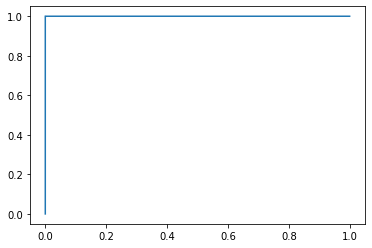

In [50]:
plt.plot(fpr2, tpr2)

In [51]:
roc_auc_score(y_test, fraud_prob2)

0.999999653356731

### Naive bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
final_model3 = gn.fit(X_train,y_train)
y_train_pred2 = gn.predict(X_train)

In [53]:
confusion_matrix(y_train,y_train_pred2)

array([[225269,   1631],
       [ 58254, 168870]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred2)

0.8681016862544711

In [55]:
y_test_pred2 = gn.predict(X_test)

In [56]:
confusion_matrix(y_test,y_test_pred2)

array([[56433,   432],
       [14546, 42095]], dtype=int64)

In [57]:
accuracy_score(y_test,y_test_pred2)

0.8680422180325269

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred2))
print("------------------------------------------------------")
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    226900
           1       0.99      0.74      0.85    227124

    accuracy                           0.87    454024
   macro avg       0.89      0.87      0.87    454024
weighted avg       0.89      0.87      0.87    454024

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     56865
           1       0.99      0.74      0.85     56641

    accuracy                           0.87    113506
   macro avg       0.89      0.87      0.87    113506
weighted avg       0.89      0.87      0.87    113506



In [65]:
y_test_prob3 = final_model3.predict_proba(X_test)
y_test_prob3 = pd.DataFrame(y_test_prob3)
y_test_prob3.head()

,0,1
0,1.478372e-41,1.000000e+00
1,2.545047e-06,9.999975e-01
2,1.000000e+00,4.262604e-10
3,6.419772e-26,1.000000e+00
4,1.000000e+00,5.729368e-10


In [70]:
df = pd.DataFrame({"col1": [1.478372e-41,2.545047e-06,1.000000e+00,6.419772e-26,1.000000e+00]})
df

,col1
0,1.478372e-41
1,2.545047e-06
2,1.000000e+00
3,6.419772e-26
4,1.000000e+00


In [72]:
df['col1'] = df['col1'].astype(int)
df

,col1
0,0
1,0
2,1
3,0
4,1


In [74]:
df1 = pd.DataFrame({'col2':[1.000000e+00,9.999975e-01,4.262604e-10,1.000000e+00,5.729368e-10]})
df1

,col2
0,1.000000e+00
1,9.999975e-01
2,4.262604e-10
3,1.000000e+00
4,5.729368e-10


In [76]:
df1['col2'] = df1['col2'].astype(int)
df1

,col2
0,1
1,0
2,0
3,1
4,0


In [66]:
y_test.head()

395737    1
473850    1
50426     0
344637    1
148214    0
Name: Class, dtype: int64

### Plot the ROC Curve for the model and find the AUC for NaiveBayes

In [61]:
#1-->fraud 0-->genuine
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
fraud_prob3 = final_model3.predict_proba(X_test)[:,1]
fpr3, tpr3, threshold3 = roc_curve(y_test, fraud_prob3)

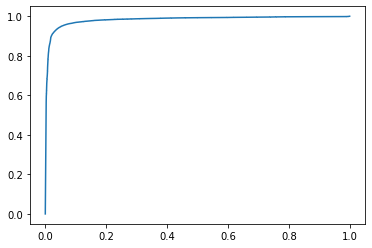

In [62]:
plt.plot(fpr3, tpr3)

In [63]:
roc_auc_score(y_test, fraud_prob3)

0.9825532882565753

### Best among logistic regression,Random forest and NaiveBayes

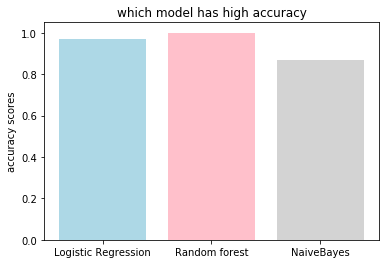

In [64]:
models = ['Logistic Regression','Random forest','NaiveBayes']
accuracy_scores = [0.97,1.00,0.87]
plt.bar(models,accuracy_scores,color=['lightblue','pink','lightgrey'])
plt.ylabel("accuracy scores")
plt.title("which model has high accuracy")
plt.show()

From the above graph we can observe that random forest has high accuracy

#### The best model is the RANDOM FOREST CLASSIFIER with high accuracy of 100% .